## Github Classroom
Github project repository: https://github.com/cs418-fa24/project-check-in-team-11

## Project Introduction
Our project aims to understand the spotify song classification/reccomendation algorithm and to see if it can be accurately recreated. Through gathering songs and their respective specific statistics from Spotify, we will determine what aspects of songs does Spotify use the most to determine the mood classification of songs. In turn, we will then evaluate whether or not an overall mood can be determined accurately from a user's liked songs library.

## Scope Adjustments
We wanted to try and recreate the Spotify wrapped, however that was a large scope and more tailored towards recreating a listening profile based on other non-song related data such as listening history, time of day, and artist preference. We pivoted the scope to focus on song related data such as track features revolving around tempo, loudness, energy, danceability, etc.

## Data Collection and Cleaning

### Retrieve Liked Songs

In [21]:
import json

import spotipy
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

# Get the user's liked songs
results = sp.current_user_saved_tracks()
liked_songs = []

while results:
    for item in results['items']:
        track = item['track']
        features = sp1.audio_features(track['id'])[0]
        liked_songs.append({
            'name': track['name'],
            'id': track['id'],
            'acousticness': features['acousticness'],
            'danceability': features['danceability'],
            'duration_ms': features['duration_ms'],
            'energy': features['energy'],
            'instrumentalness': features['instrumentalness'],
            'key': features['key'],
            'liveness': features['liveness'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'valence': features['valence']
        })

    results = sp.next(results)

#TODO rename the file so that it does not overwrite anyone else's
with open('/Users/conrad/dev-school/418/final-project/raw/liked_songs_1.json', 'w') as json_file:
    json.dump(liked_songs, json_file, indent=4)


SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

### Retrieve Spotify-generated Playlists for Each Mood (happy, sad, energetic, chill)

In [ ]:
### Steps to get playlists ready to pull
# 1.) Find your mix playlists for each mood (happy, sad, energetic, chill)
# 2.) Click on the "..." and add to another playlist and create a new one. Spotify will create a default name "<mood> Mix (2)"
# 3.) Once you repeat this for all the moods, you are ready to use this script

import json
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# TODO insert info same as library.py...
CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

for mood, p_id in moods.items():
    results = sp.playlist_items(p_id)
    tracks = []

    while results:
        for item in results['items']:
            track = item['track']
            features = sp1.audio_features(track['id'])[0]

            if features is None:
                continue

            tracks.append({
                'name': track['name'],
                'id': track['id'],
                'acousticness': features['acousticness'],
                'danceability': features['danceability'],
                'duration_ms': features['duration_ms'],
                'energy': features['energy'],
                'instrumentalness': features['instrumentalness'],
                'key': features['key'],
                'liveness': features['liveness'],
                'loudness': features['loudness'],
                'mode': features['mode'],
                'speechiness': features['speechiness'],
                'tempo': features['tempo'],
                'time_signature': features['time_signature'],
                'valence': features['valence']
            })
        print("mood complete")
        # get next set of tracks
        results = sp.next(results)

    #TODO make sure to enter the number corresponding to your data
    num = 1
    with open(f'spotify_{mood.lower()}_{num}.json', 'w') as file:
        json.dump(tracks, file, indent=4)

    file.close()


SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

### Import into Pandas Dataframe

In [23]:
import json
import pandas as pd

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)


final_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

## Data Exploration
Our project's data consists of multiple JSON files, each representing different sets of Spotify songs categorized by moods such as chill, energetic, happy, and sad, along with a separate collection of liked songs from personal user libraries. These files contain attributes that are important in understanding song characteristics which may influence their mood classification, such as tempo, loudness, energy, danceability, and others.

In our preliminary analysis, we explored how these attributes distribute across various playlists to hypothesize which features might be most influential in determining a song's mood. We encountered significant challenges due to the size of the data files and API rate limits.

Interestingly, initial visualizations suggest clear distinctions in certain attributes among different mood-based playlists; for instance, songs in the happy playlist tend to have higher valence and tempo compared to those in the sad playlist. This aligns with our objective to differentiate between the patterns that could potentially recreate Spotify's mood classification logic. Moving forward, we plan to apply statistical tests to confirm these observations and refine our models accordingly, aiming to predict mood classifications with high accuracy.

In [24]:
import pandas as pd
import json
import numpy as np

dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

liked_songs_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
liked_songs_df = liked_songs_df.drop(columns=drop)

#liked_songs_df.head(5)
liked_songs_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2784.000000,2784.000000,2784.00000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,0.264226,0.673031,216885.16056,0.602474,0.181876,5.345905,0.179052,-8.239840,0.544181,0.126167,118.323834,3.953305,0.527378
std,0.272244,0.159629,78603.04152,0.187366,0.321257,3.696630,0.137154,3.638828,0.498134,0.122564,27.905911,0.334789,0.240315
min,0.000003,0.000000,15967.00000,0.008580,0.000000,0.000000,0.019000,-36.856000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043000,0.580000,167217.75000,0.483000,0.000000,2.000000,0.096400,-9.776250,0.000000,0.040400,96.051000,4.000000,0.344750
50%,0.160500,0.700000,206033.50000,0.616000,0.000096,5.000000,0.124000,-7.587000,1.000000,0.068300,117.046000,4.000000,0.533000
75%,0.428000,0.787250,253346.50000,0.738000,0.194000,9.000000,0.217250,-5.858500,1.000000,0.182000,136.008750,4.000000,0.724000
max,0.996000,0.978000,828560.00000,0.996000,0.973000,11.000000,0.983000,3.025000,1.000000,0.918000,215.449000,5.000000,0.981000


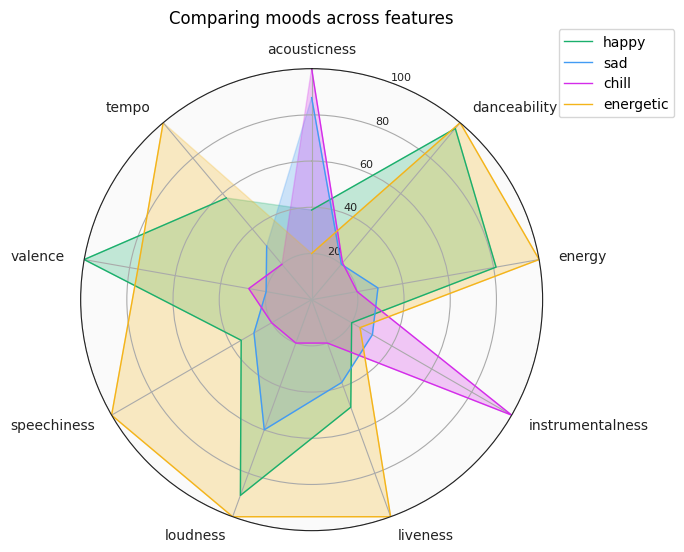

In [25]:
import matplotlib.pyplot as plt

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)

moods_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
moods_df = moods_df.drop(columns=drop)

#moods_df.head(5)
#moods_df.describe()

moods_mean_df = moods_df.groupby('mood').mean()

#moods_mean_df.head(4)

factors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

new_max = 100
new_min = 20
new_range = new_max - new_min

for factor in factors:
    max_val = moods_mean_df[factor].max()
    min_val = moods_mean_df[factor].min()
    val_range = max_val - min_val
    moods_mean_df[factor + '_Adj'] = moods_mean_df[factor].apply(
        lambda x: (((x - min_val) * new_range) / val_range) + new_min)
    
moods_mean_df = moods_mean_df.reset_index()
#moods_mean_df.head(4)
 
dft = moods_mean_df.loc[:, ['mood', 'acousticness_Adj', 'danceability_Adj', 'energy_Adj',
                             'instrumentalness_Adj', 'liveness_Adj', 'loudness_Adj', 'speechiness_Adj',
                             'valence_Adj', 'tempo_Adj']]
dft.rename(columns={
    'acousticness_Adj': 'acousticness',
    'danceability_Adj': 'danceability',
    'energy_Adj': 'energy',
    'instrumentalness_Adj': 'instrumentalness',
    'liveness_Adj': 'liveness',
    'loudness_Adj': 'loudness',
    'speechiness_Adj': 'speechiness',
    'valence_Adj': 'valence',
    'tempo_Adj': 'tempo'
}, inplace=True)

dft.set_index('mood', inplace=True)

labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_to_radar(mood, color):
    values = dft.loc[mood].tolist()
    ax.plot(angles, values, color=color, linewidth=1, label=mood)
    ax.fill(angles, values, color=color, alpha=0.25)

add_to_radar('happy', '#1aaf6c')
add_to_radar('sad', '#429bf4')
add_to_radar('chill', '#d42cea')
add_to_radar('energetic', '#f4b41a')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

ax.set_ylim(0, 100)
ax.set_rlabel_position(180 / num_vars)

ax.tick_params(colors='#222222')
ax.tick_params(axis='y', labelsize=8)
ax.grid(color='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')

ax.set_title('Comparing moods across features', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


In [26]:
happy_df = moods_df[moods_df['mood'] == 'happy']
# happy_df.head(5)
happy_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.228003,0.699980,194467.153333,0.675430,0.050095,5.266667,0.173191,-6.669817,0.650000,0.076948,119.553113,3.980000,0.703342
std,0.221277,0.115443,45106.245635,0.147835,0.169320,3.488474,0.147277,2.635357,0.477767,0.086437,24.054849,0.230457,0.191693
min,0.000038,0.197000,60942.000000,0.166000,0.000000,0.000000,0.024600,-22.602000,0.000000,0.026300,68.837000,1.000000,0.064600
25%,0.042775,0.633000,169783.000000,0.567000,0.000000,2.000000,0.085575,-7.986250,0.000000,0.036675,103.655750,4.000000,0.550750
50%,0.165000,0.712000,197575.000000,0.683000,0.000007,5.000000,0.113000,-6.220500,1.000000,0.045950,117.684000,4.000000,0.738000
75%,0.352750,0.780250,218013.000000,0.791000,0.001670,8.250000,0.209500,-4.873250,1.000000,0.077675,129.292500,4.000000,0.860000
max,0.972000,0.935000,473013.000000,0.991000,0.978000,11.000000,0.955000,-1.931000,1.000000,0.711000,209.688000,5.000000,0.981000


In [27]:
sad_df = moods_df[moods_df['mood'] == 'sad']
# sad_df.head(5)
sad_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.522723,0.558353,199938.663333,0.432511,0.131883,5.366667,0.161904,-9.853107,0.690000,0.071891,114.860097,3.860000,0.324138
std,0.338082,0.150576,55978.912548,0.204289,0.277139,3.531827,0.119905,3.796737,0.463266,0.092606,30.075703,0.477311,0.189012
min,0.000008,0.174000,57370.000000,0.014800,0.000000,0.000000,0.051100,-27.117000,0.000000,0.024700,59.981000,1.000000,0.034100
25%,0.159000,0.457000,161423.000000,0.286750,0.000000,2.000000,0.101000,-12.072500,0.000000,0.031500,88.491750,4.000000,0.180000
50%,0.609500,0.556500,200738.000000,0.415000,0.000310,5.000000,0.115000,-9.313000,1.000000,0.041000,113.983000,4.000000,0.295500
75%,0.830000,0.669000,237807.000000,0.571250,0.038100,8.000000,0.167000,-7.115250,1.000000,0.062625,133.993500,4.000000,0.432750
max,0.989000,0.946000,400560.000000,0.941000,0.962000,11.000000,0.938000,-2.810000,1.000000,0.777000,220.099000,5.000000,0.961000


In [28]:
chill_df = moods_df[moods_df['mood'] == 'chill']
# chill_df.head(5)
chill_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,298.000000,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.598625,0.559860,1.895219e+05,0.389692,0.681035,5.211409,0.143961,-14.062195,0.617450,0.064918,113.081587,3.838926,0.360358
std,0.345235,0.194147,9.815156e+04,0.230500,0.350116,3.524652,0.097558,6.789103,0.486827,0.061753,33.388542,0.569330,0.253110
min,0.002110,0.000000,5.460000e+04,0.005580,0.000000,0.000000,0.050100,-32.838000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258250,0.441000,1.352610e+05,0.192000,0.540750,2.000000,0.096925,-16.510750,0.000000,0.035800,86.981500,4.000000,0.142000
50%,0.665000,0.585000,1.735805e+05,0.402000,0.868000,5.000000,0.111000,-12.035000,1.000000,0.043100,111.525500,4.000000,0.313500
75%,0.936750,0.702000,2.189665e+05,0.563750,0.918000,8.000000,0.142750,-9.093500,1.000000,0.060700,135.294750,4.000000,0.538750
max,0.996000,0.944000,1.020000e+06,0.876000,0.983000,11.000000,0.644000,-2.851000,1.000000,0.425000,216.542000,5.000000,0.979000


In [29]:
energetic_df = moods_df[moods_df['mood'] == 'energetic']
# energetic_df.head(5)
energetic_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.00000,300.000000,300.000000,300.000000,300.000000
mean,0.114087,0.70598,188854.886667,0.763937,0.083261,5.326667,0.223101,-5.63511,0.54000,0.128178,126.900030,3.993333,0.591366
std,0.163824,0.12925,57081.588246,0.139076,0.222798,3.741651,0.192518,2.11770,0.49923,0.118072,22.628471,0.141500,0.236231
min,0.000090,0.30500,87076.000000,0.305000,0.000000,0.000000,0.024500,-13.55500,0.00000,0.026600,75.142000,3.000000,0.038500
25%,0.009573,0.62950,150003.250000,0.676000,0.000000,1.000000,0.101750,-7.12600,0.00000,0.044925,112.960000,4.000000,0.417500
50%,0.041650,0.71850,185577.000000,0.784500,0.000003,5.000000,0.147000,-5.42800,1.00000,0.074350,126.029000,4.000000,0.616500
75%,0.150000,0.79200,215349.750000,0.872500,0.002873,9.000000,0.288500,-4.26300,1.00000,0.196250,140.318750,4.000000,0.779000
max,0.841000,0.95700,428048.000000,0.998000,0.938000,11.000000,0.983000,0.32800,1.00000,0.918000,198.035000,5.000000,0.970000


## Data Visualization
Our hypothesis is that certain song attributes are more prevalent in specific moods. To test this hypothesis, we visualized the distribution of song attributes across different moods. We focused on the following attributes: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence and tempo.

<Axes: xlabel='instrumentalness', ylabel='mood'>

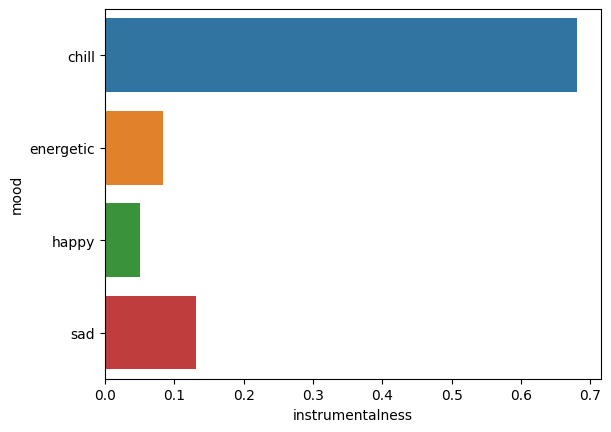

In [30]:
import seaborn as sns

moods_mean_df = moods_df.groupby('mood').mean()

sns.barplot(moods_mean_df, x="instrumentalness", y="mood", hue="mood", legend=False)



<Axes: xlabel='valence', ylabel='mood'>

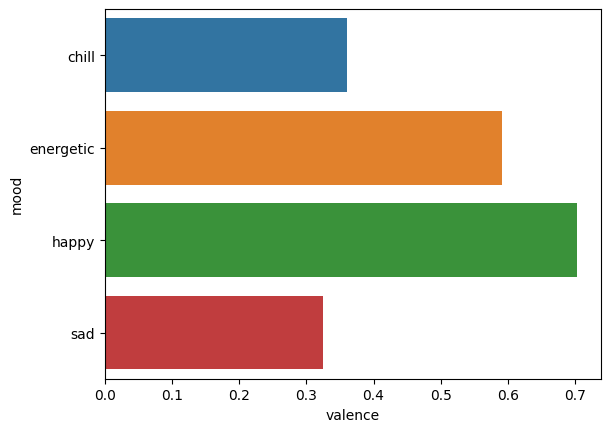

In [31]:
sns.barplot(moods_mean_df, x="valence", y="mood", hue="mood", legend=False)

<Axes: xlabel='speechiness', ylabel='mood'>

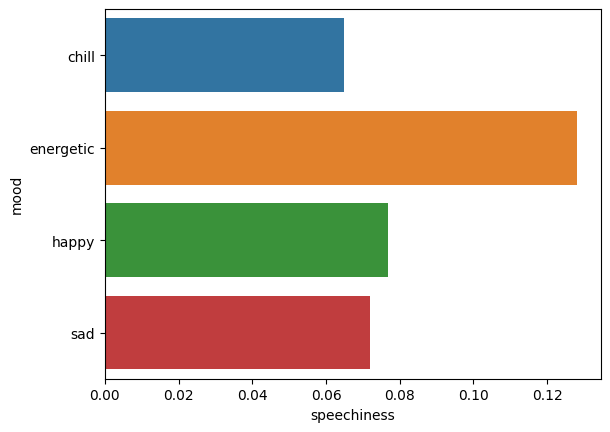

In [32]:
sns.barplot(moods_mean_df, x="speechiness", y="mood", hue="mood", legend=False)

<Axes: xlabel='danceability', ylabel='mood'>

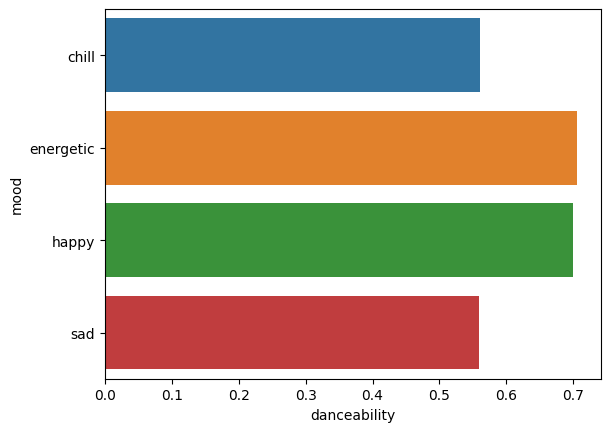

In [33]:
sns.barplot(moods_mean_df, x="danceability", y="mood", hue="mood", legend=False)

<Axes: xlabel='energy', ylabel='mood'>

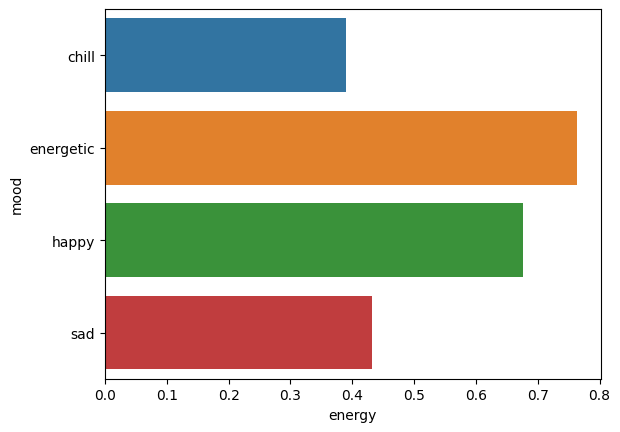

In [34]:
sns.barplot(moods_mean_df, x="energy", y="mood", hue="mood", legend=False)

<Axes: xlabel='tempo', ylabel='mood'>

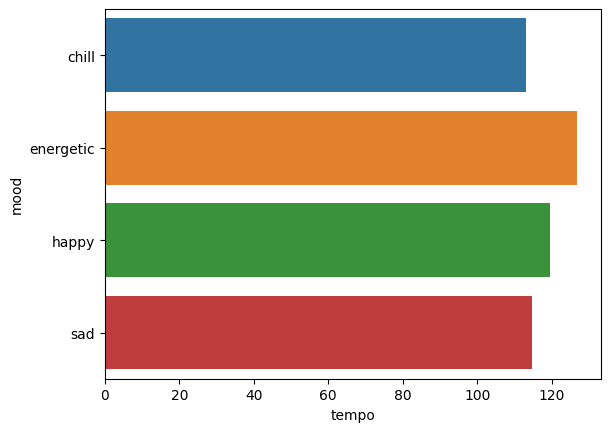

In [35]:
sns.barplot(moods_mean_df, x="tempo", y="mood", hue="mood", legend=False)

<Axes: xlabel='loudness', ylabel='mood'>

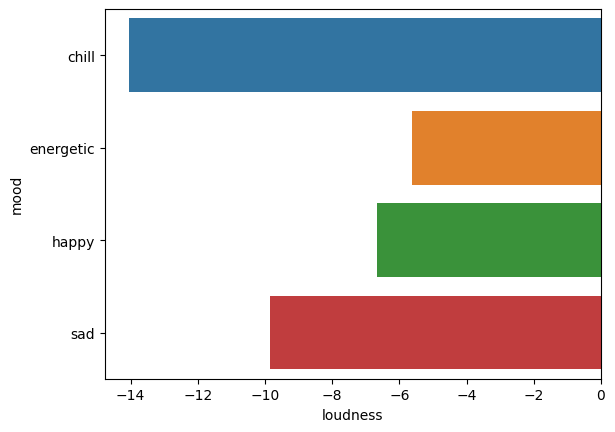

In [36]:
sns.barplot(moods_mean_df, x="loudness", y="mood", hue="mood", legend=False)

<Axes: xlabel='liveness', ylabel='mood'>

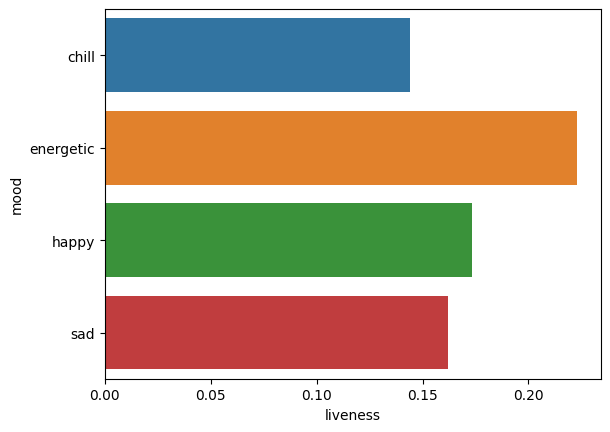

In [37]:
sns.barplot(moods_mean_df, x="liveness", y="mood", hue="mood", legend=False)

<Axes: xlabel='acousticness', ylabel='mood'>

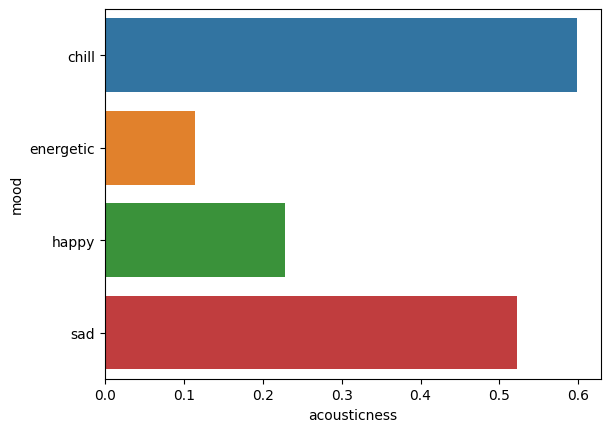

In [38]:
sns.barplot(moods_mean_df, x="acousticness", y="mood", hue="mood", legend=False)

### Chill
This mood seems to be characterized by higher values of acousticness and instrumentalness.

### Happy
This mood seems to be characterized by higher values of valence and lower values of instrumentalness.

### Energetic
This mood seems to be characterized by higher values of tempo, speechiness and liveness.

### Sad
This mood seems to be characterized by higher values of acousticness and lower values of instrumentalness.

## ML Data Analysis

### Model Training



In [39]:
from sklearn.linear_model import (
    LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet,
    BayesianRidge, SGDRegressor, SGDClassifier, Perceptron, PassiveAggressiveRegressor,
    PassiveAggressiveClassifier, RidgeClassifier, RidgeCV, LassoCV, ElasticNetCV
)

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,
    GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor,
    BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor,
    VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
)

from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import (
    KMeans, MiniBatchKMeans, MeanShift, SpectralClustering, AgglomerativeClustering,
    DBSCAN, OPTICS, Birch, AffinityPropagation
)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import json
import pandas as pd
import json
import numpy as np
from sklearn.preprocessing import LabelEncoder

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

final_df.to_csv('training.csv')

#splitting
X = final_df.iloc[:, 0:13]
Y = final_df.iloc[:, 13]
# encoder = LabelEncoder()
# y = encoder.fit_transform(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2, random_state=1)

# k-fold
k = 10
forest = RandomForestClassifier(random_state=2)
scores = cross_val_score(forest, xtrain, ytrain, cv=k)
print('CV scores', scores)
print('Mean CV scores', np.mean(scores))

# single
forest.fit(xtrain, ytrain)
print('Fit Score', forest.score(xtest, ytest))


CV scores [0.003367   0.00673401 0.003367   0.003367   0.00561167 0.01010101
 0.00897868 0.00448934 0.00337079 0.00449438]
Mean CV scores 0.0053880881221705194
Fit Score 0.0026929982046678637


## Analysis

Based on the output below, we can see the percentage of tracks classified as a certain mood. 
Talk a little bit more about the individual outputs.

In [41]:
#analysis

import json
import pandas as pd

dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

# Load each JSON file into a data frame
for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        # Drop the 'name' and 'id' columns for each data frame
        df = df.drop(columns=['name', 'id'], errors='ignore')
        dfs.append(df)

predictions = []

for df in dfs:
    predictions.append(forest.predict(df.iloc[:, :]))

person = 1
for prediction in predictions:
    print(f'Person {person}')
    print('Happy', (prediction.tolist().count('happy')/len(prediction.tolist()))*100)
    print('Sad', (prediction.tolist().count('sad')/len(prediction.tolist()))*100)
    print('Chill', (prediction.tolist().count('chill')/len(prediction.tolist()))*100)
    print('Energetic', (prediction.tolist().count('energetic')/len(prediction.tolist()))*100)
    print()
    person += 1

Person 1
Happy 25.787401574803148
Sad 24.409448818897637
Chill 26.37795275590551
Energetic 23.4251968503937

Person 2
Happy 23.83073496659243
Sad 24.610244988864142
Chill 26.83741648106904
Energetic 24.721603563474385

Person 3
Happy 16.666666666666664
Sad 33.33333333333333
Chill 27.77777777777778
Energetic 22.22222222222222

Person 4
Happy 20.833333333333336
Sad 39.58333333333333
Chill 16.666666666666664
Energetic 22.916666666666664

Person 5
Happy 24.6
Sad 24.4
Chill 24.6
Energetic 26.400000000000002

Person 6
Happy 20.522388059701495
Sad 25.37313432835821
Chill 26.119402985074625
Energetic 27.985074626865668



## Progress reflection
#### Hardest Part of the Project:
The most challenging aspect has been handling the large data sets and managing the Spotify API rate limits, which restricted our ability to retrieve data efficiently. These technical issues required a reevaluation of our data collection strategies, including implementing caching and batching requests to better manage API usage.

#### Initial Insights:
Our exploratory data analysis revealed that certain song attributes like tempo, valence, and energy significantly vary across different moods. For instance, 'happy' songs generally exhibit higher tempo and energy levels than 'sad' songs, which tend to feature lower valence scores.

#### Concrete Results:
While we have not yet applied machine learning models to predict song moods, our preliminary visualizations and statistical analyses confirm that the attributes we are studying do correlate with the categorizations provided by Spotify.

#### Current Problems and Adjustments:
Given the limitations in data acquisition, we need to allocate more time towards enhancing our data processing capabilities to handle large volumes of data more effectively by possibly using different data querying tools. 

#### On Track:
We are on track in terms of understanding the data and setting up the necessary infrastructure for analysis. However, we are being delayed by API limit constraints.

#### Change in Project Direction:
Based on initial findings, focusing more on implementing the different features of this model could be beneficial. Enhancing our feature set by integrating additional data such as user listening habits might improve our model's accuracy and align better with Spotify's algorithm.




## Roles and Coordination

Finding data sources and cleaning (By 11/7): Conrad Domagala, Tyler Strach


Data Exploration (By 11/15): Ceasar Attar, Andrea Carbonati


Statistical analysis (By 11/15): Juan Cruz


Data Visualization (By 11/23): Ceasar Attar, Andrea Carbonati


Machine Learning Applications (By 11/29): Conrad Domagala, Tyler Strach

## Next Steps
### Optimize Data Collection:
Implement more efficient data handling to manage larger datasets without hitting API limits.
### Expand Feature Analysis:
Incorporate additional features from user profiles to enrich our predictive models.
### Model Development:
Start training preliminary machine learning models using the cleaned and processed data.
### Evaluate Progress:
We will assess our model's performance based on its accuracy in classifying song moods and adjust our strategies accordingly. This evaluation will help us determine if our approach aligns with the project's goals and Spotify's classification standards.